# Studies on Subsonic jet propagation
> ## To study the development of velocity profiles in an axisymmetric jet by using a single Pitot tube with traverse mechanism.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def pressure2Velocity(df,Type,D=10):
    # pressure in cm-hg
    rho = 1.225
    stagnation_pressure = np.asarray(df[0])
    pitote_pressure = np.asarray(df[1])
    P_o = np.multiply(1333.2239,stagnation_pressure)
    P_d = np.multiply(1333.2239,pitote_pressure)
    U0pr   = np.sqrt(2*(P_o)/rho)
    Upr   = np.sqrt(2*(P_d)/rho)
    df['U0'] = U0pr
    df['u'] = Upr
    Upr_by_Uo = Upr/U0pr
    df['u/U0'] = Upr_by_Uo

    if Type == "radial":
        xByD = np.linspace(0, D/2,len(Upr_by_Uo))
        df['y/D'] = xByD
    if Type == "centerline":
        xByD = np.linspace(0,25,len(Upr_by_Uo))
        df['x/D'] = xByD
    return (Upr_by_Uo,xByD)

## Pressure along centerline

In [ ]:
centerLine_df = pd.read_csv("Aerodynamics_Experiment_4_Data/pressure along centerline.txt",delimiter='\t',header=None)
centerLine_df.rename(columns={0 : "Stagnation pressure in Chamber", 1: "Pitote Probe pressure"})

In [128]:
centerLine_df

,0,1,U0,u,u/U0,x/D
0,3.070,3.030,81.746221,81.211927,0.993464,0.000000
1,3.040,2.991,81.345829,80.687583,0.991908,0.308642
2,3.014,2.970,80.997222,80.403828,0.992674,0.617284
3,3.008,2.958,80.916561,80.241231,0.991654,0.925926
4,3.000,2.950,80.808887,80.132650,0.991632,1.234568
...,...,...,...,...,...,...
77,2.927,0.122,79.819657,16.295902,0.204159,23.765432
78,2.923,0.114,79.765099,15.752552,0.197487,24.074074
79,2.924,0.113,79.778742,15.683310,0.196585,24.382716
80,2.920,0.107,79.724155,15.261260,0.191426,24.691358


>### pressure in *cm of Hg*

In [52]:
velocity1pr,x = pressure2Velocity(centerLine_df,D=10,Type="centerline")

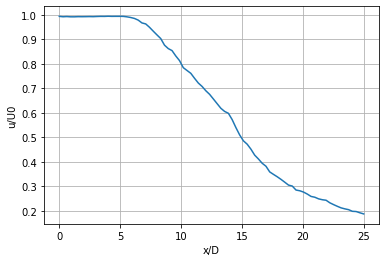

In [53]:
plt.plot(x,velocity1pr);
plt.xlabel("x/D");
plt.ylabel("u/U0");
plt.grid();

## Radial direction pressure

### 1. At 2D location

In [ ]:
_2DLocation_df = pd.read_csv("Aerodynamics_Experiment_4_Data/pressure in radial direction at 2D",delimiter='\t',header=None)
_2DLocation_df.drop(index=[12,13],inplace=True)
_2DLocation_df[0] = pd.to_numeric(_2DLocation_df[0])
_2DLocation_df.rename(columns={0 : "Stagnation pressure in Chamber", 1: "Pitote Probe pressure"})

In [67]:
_2DLocation_df

,0,1,U0,u,u/U0,y/D
0,2.970,2.951,80.403828,80.146231,0.996796,0.000000
1,2.965,2.942,80.336119,80.023922,0.996114,0.454545
2,2.967,2.295,80.363209,70.678910,0.879493,0.909091
3,2.967,0.762,80.363209,40.726396,0.506779,1.363636
4,2.966,0.137,80.349665,17.268666,0.214919,1.818182
5,2.967,0.010,80.363209,4.665503,0.058055,2.272727
6,2.965,0.007,80.336119,3.903440,0.048589,2.727273
7,2.966,0.006,80.349665,3.613883,0.044977,3.181818
8,2.964,0.006,80.322570,3.613883,0.044992,3.636364
9,2.963,0.005,80.309020,3.299009,0.041079,4.090909


In [55]:
velocity2D, y2D = pressure2Velocity(_2DLocation_df,Type="radial")

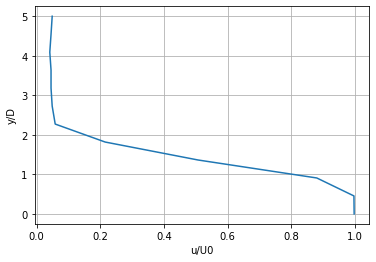

In [56]:
plt.plot(velocity2D,y2D);
plt.xlabel("u/U0")
plt.ylabel("y/D");
plt.grid();

### 2. At 8D location

In [ ]:
_8DLocation_df = pd.read_csv("Aerodynamics_Experiment_4_Data/pressure in radial direction at 8D",delimiter='\t',header=None)
_8DLocation_df.drop(index=[19,20],inplace=True)
_8DLocation_df[0] = pd.to_numeric(_8DLocation_df[0])
_8DLocation_df.rename(columns={0 : "Stagnation pressure in Chamber", 1: "Pitote Probe pressure"})

In [68]:
_8DLocation_df

,0,1,U0,u,u/U0,y/D
0,3.004,1.065,80.862742,48.147451,0.595422,0.000000
1,2.998,0.902,80.781946,44.310002,0.548514,0.277778
2,3.000,0.685,80.808887,38.613910,0.477842,0.555556
3,3.006,0.551,80.889656,34.631739,0.428136,0.833333
4,3.005,0.341,80.876200,27.244302,0.336864,1.111111
5,3.005,0.206,80.876200,21.175424,0.261825,1.388889
6,3.004,0.126,80.862742,16.560894,0.204803,1.666667
7,2.997,0.062,80.768473,11.617009,0.143831,1.944444
8,2.997,0.038,80.768473,9.094740,0.112603,2.222222
9,2.998,0.021,80.781946,6.760957,0.083694,2.500000


In [59]:
velocity8D, y8D = pressure2Velocity(_8DLocation_df,Type="radial")

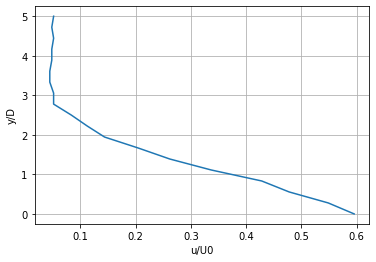

In [60]:
plt.plot(velocity8D,y8D);
plt.xlabel("u/U0")
plt.ylabel("y/D");
plt.grid();

### 3. At 23D location

In [86]:
_23DLocation_df = pd.read_csv("Aerodynamics_Experiment_4_Data/pressure in radial direction at 23D",delimiter='\t',header=None)
_23DLocation_df.drop(index=[50,51],inplace=True)
_23DLocation_df[0] = pd.to_numeric(_23DLocation_df[0])

In [100]:
_23DLocation_df1 = pd.DataFrame.copy(_23DLocation_df[:len(_23DLocation_df)//2])

In [101]:
velocity23D1, y23D1 = pressure2Velocity(_23DLocation_df1,Type="radial")

In [102]:
_23DLocation_df1

,0,1,U0,u,u/U0,y/D
0,2.908,0.202,79.560170,20.968829,0.263559,0.000000
1,2.892,0.185,79.340995,20.067088,0.252922,0.208333
2,2.891,0.171,79.327277,19.292857,0.243206,0.416667
3,2.890,0.146,79.313556,17.826863,0.224764,0.625000
4,2.892,0.134,79.340995,17.078546,0.215255,0.833333
5,2.890,0.095,79.313556,14.380047,0.181306,1.041667
6,2.890,0.077,79.313556,12.946246,0.163229,1.250000
7,2.890,0.066,79.313556,11.985895,0.151120,1.458333
8,2.888,0.047,79.286107,10.114570,0.127571,1.666667
9,2.889,0.038,79.299832,9.094740,0.114688,1.875000


In [97]:
_23DLocation_df2 = pd.DataFrame.copy(_23DLocation_df[len(_23DLocation_df)//2:])

In [98]:
velocity23D2, y23D2 = pressure2Velocity(_23DLocation_df2,Type="radial")

In [99]:
_23DLocation_df2

,0,1,U0,u,u/U0,y/D
25,2.861,0.212,78.914612,21.481590,0.272213,0.000000
26,3.050,0.206,81.479512,21.175424,0.259886,0.208333
27,3.051,0.179,81.492868,19.738994,0.242217,0.416667
28,3.054,0.170,81.532924,19.236363,0.235934,0.625000
29,3.050,0.147,81.479512,17.887810,0.219538,0.833333
30,3.044,0.117,81.399329,15.958477,0.196052,1.041667
31,3.043,0.087,81.385957,13.761258,0.169086,1.250000
32,3.044,0.064,81.399329,11.802893,0.145000,1.458333
33,3.042,0.049,81.372583,10.327532,0.126917,1.666667
34,3.042,0.042,81.372583,9.561436,0.117502,1.875000


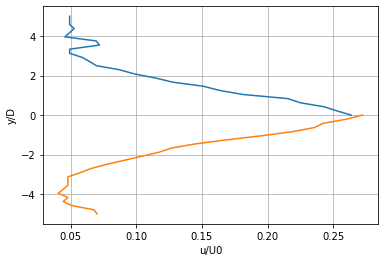

In [95]:
plt.plot(velocity23D1,y23D1);
plt.plot(velocity23D2, -y23D2);
plt.xlabel("u/U0")
plt.ylabel("y/D");
plt.grid();

# Combined Graph

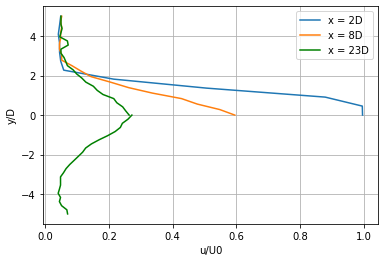

In [96]:
plt.plot(velocity2D,y2D);
plt.plot(velocity8D,y8D);
plt.plot(velocity23D1,y23D1,'-g');
plt.plot(velocity23D2,-y23D2,'-g');
plt.legend(["x = 2D","x = 8D","x = 23D"]);
plt.xlabel('u/U0');
plt.ylabel("y/D");
plt.grid();